<a href="https://colab.research.google.com/github/Jamiul-kawsar/IPCV_Covid_19_Dataset/blob/main/IPCV_Covid_19_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Curated COVID-19 Chest X-Ray Dataset"
data_path_train = "/content/drive/MyDrive/Colab Notebooks/Curated COVID-19 Chest X-Ray Dataset/train"
data_path_val = "/content/drive/MyDrive/Colab Notebooks/Curated COVID-19 Chest X-Ray Dataset/validation"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data augmentation for training
train_dataset_generator = ImageDataGenerator(
    rescale=1./255,
    interpolation_order = 1,
    fill_mode = 'bilinear',
    validation_split=0.0,
    dtype=None
)
validation_generator = ImageDataGenerator(
    rescale  = 1./255,
    validation_split=0.0,
    dtype=None
)

In [ ]:
# load train data
train = train_dataset_generator.flow_from_directory(
    data_path_train,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb'
)
val = validation_generator.flow_from_directory(
    data_path_val,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb'
)

Found 7383 images belonging to 3 classes.
Found 1853 images belonging to 3 classes.


In [ ]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

{'0_Normal': 0, '1_Covid19': 1, '2_Pneumonia': 2}
['0_Normal', '1_Covid19', '2_Pneumonia']


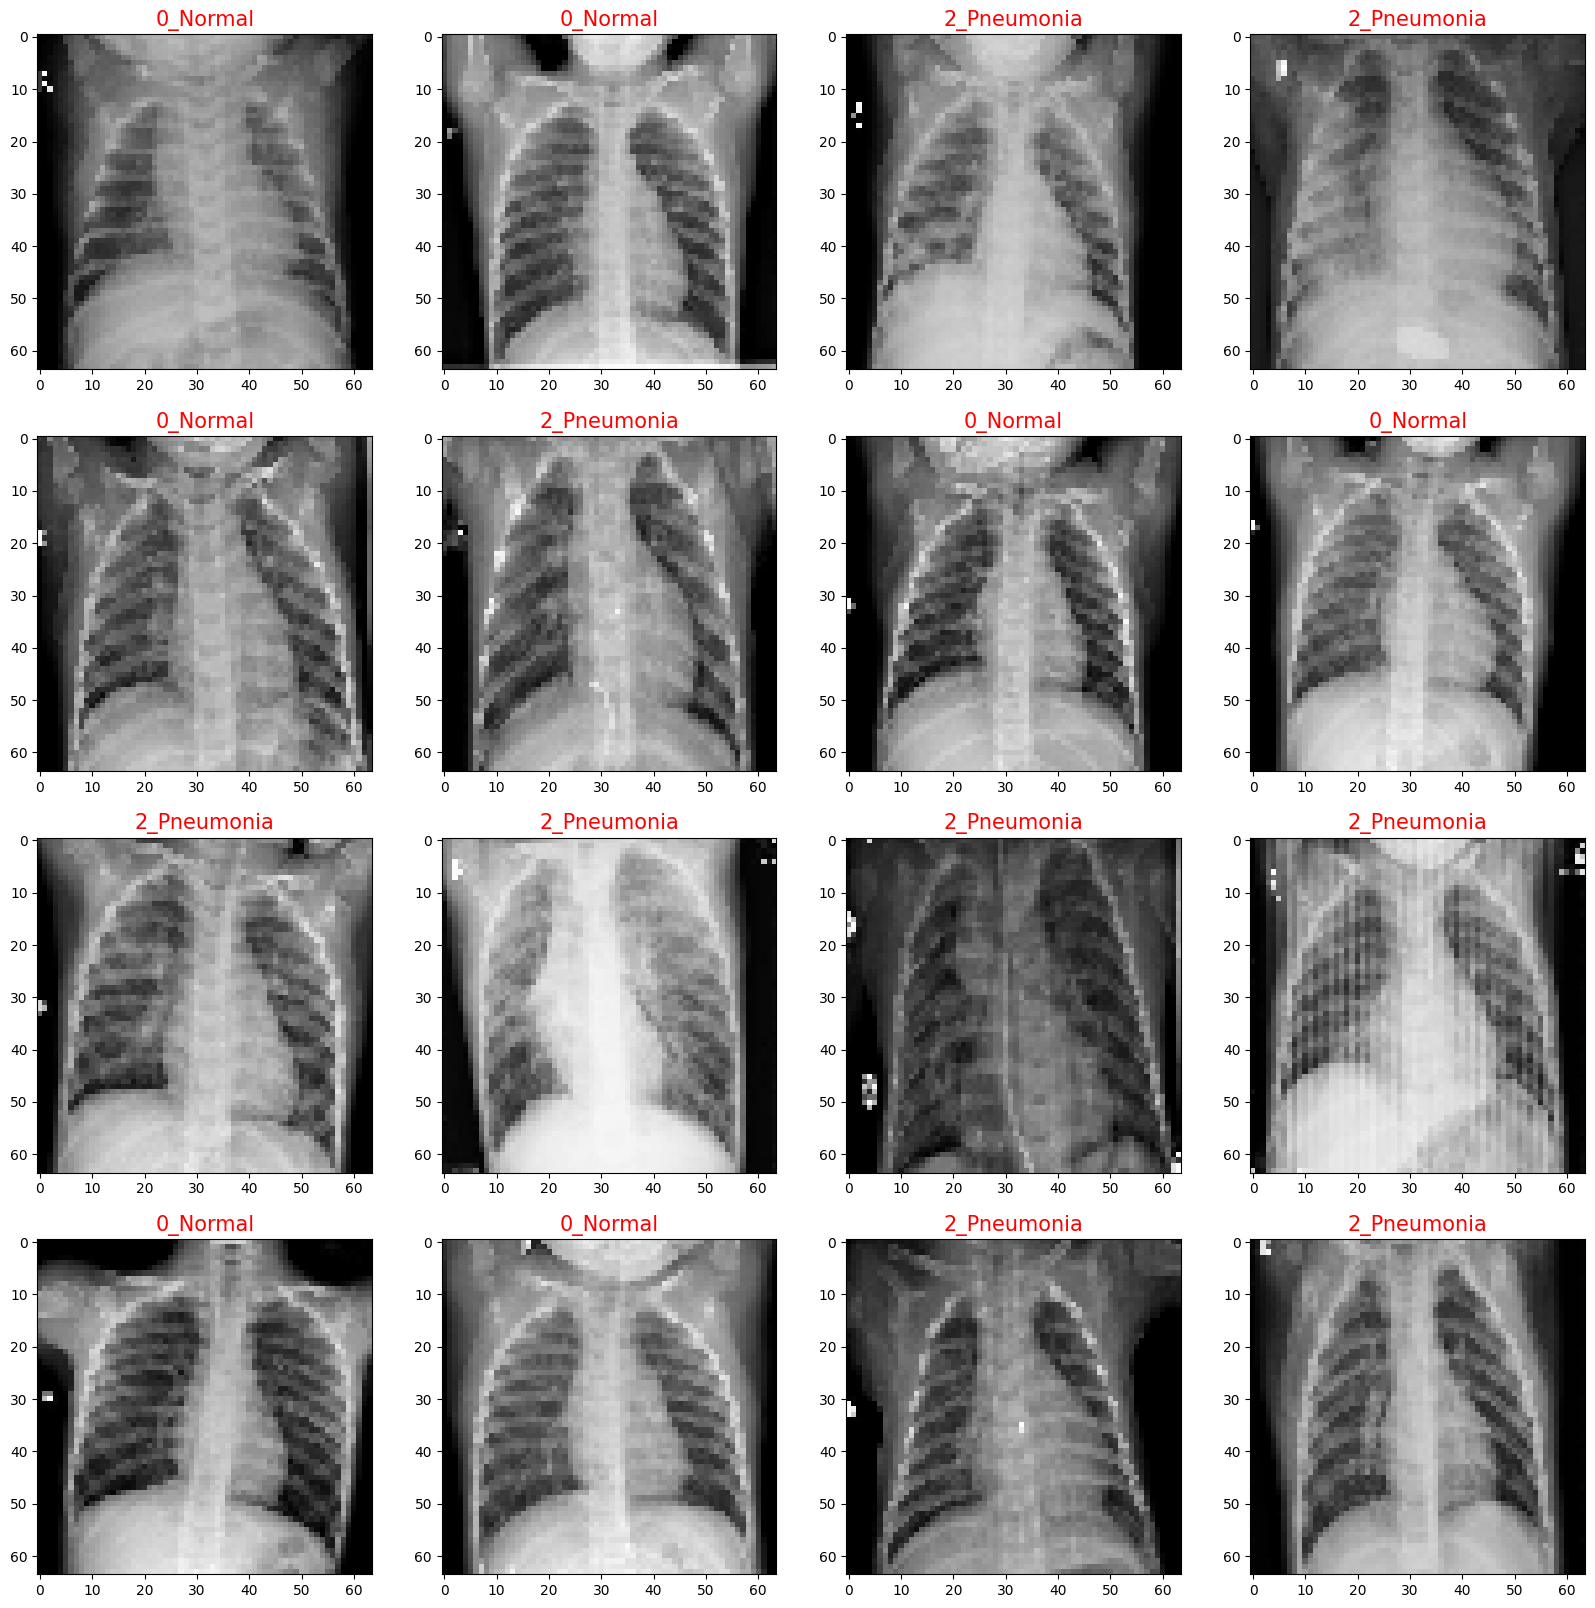

In [ ]:
#visualization
class_dict = train.class_indices
print(class_dict)
classes = list(class_dict.keys())
print(classes)
images, labels = next(train)
plt.figure(figsize=(20,20))

for i in range(16):
  plt.subplot(4,4,i+1)
  image = images[i]
  plt.imshow(image)
  index = np.argmax(labels[i])
  class_name = classes[index]
  plt.title(class_name, fontsize = 15, color ='r')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Image parameters
img_height, img_width = 256, 256
input_shape = (img_height, img_width, 3)
batch_size = 32

# Load training dataset (80%)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 7383 files belonging to 3 classes.
Using 5907 files for training.


In [ ]:
# Load validation dataset (20%)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 7383 files belonging to 3 classes.
Using 1476 files for validation.


In [ ]:
class_names_train = train_ds.class_names
class_names_val = val_ds.class_names
print("Class Names:", class_names_train)

Class Names: ['0_Normal', '1_Covid19', '2_Pneumonia']


In [ ]:
#Performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Build the Sequential CNN Model**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

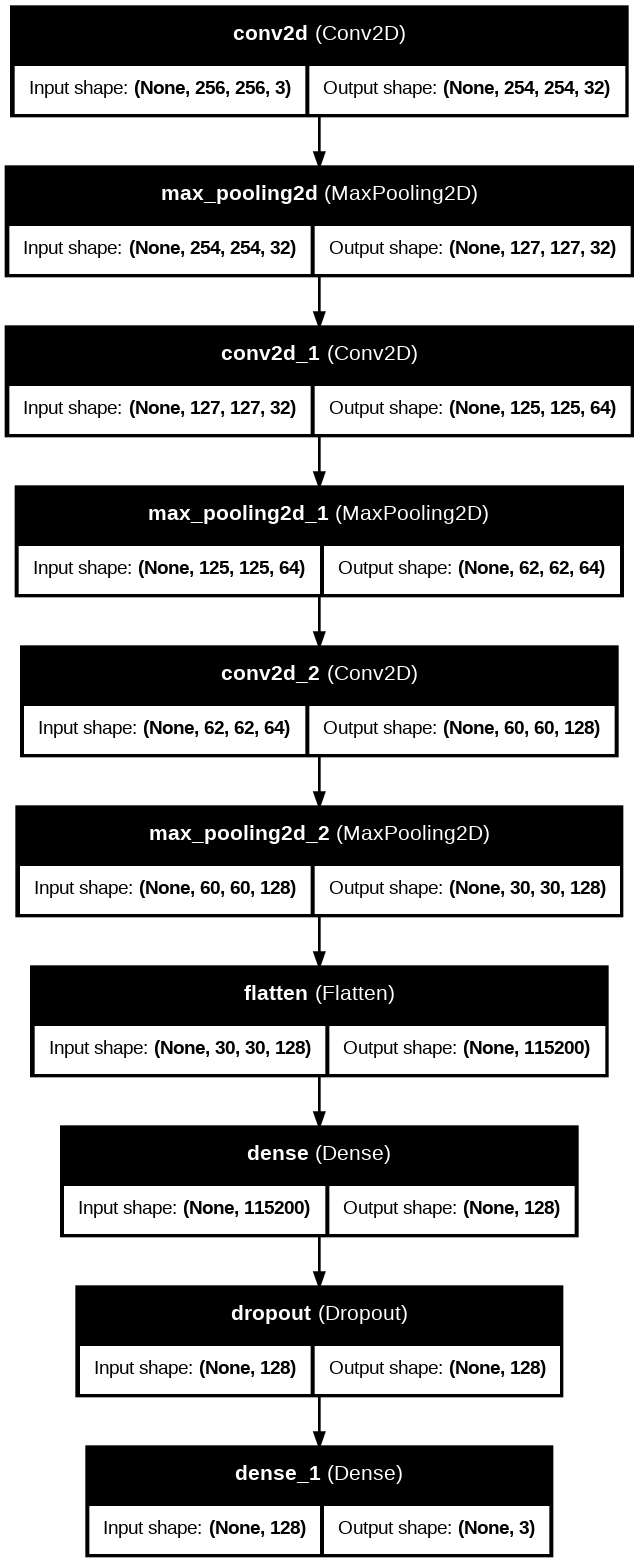

In [ ]:
model = Sequential()
# layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
# layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(class_names_train), activation='softmax'))
model.summary()
plot_model(model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
model.evaluate(val_ds)

In [ ]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

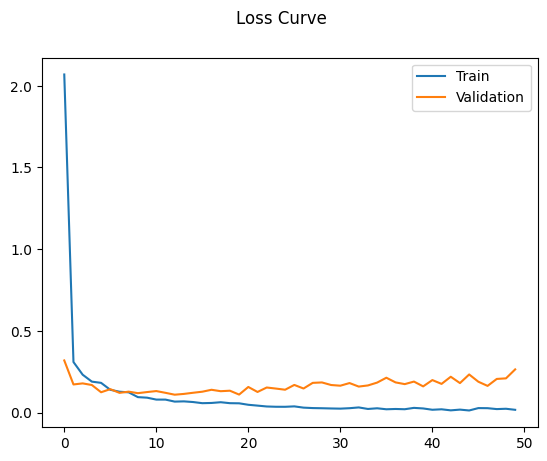

In [ ]:
plt.suptitle('Loss Curve')
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━

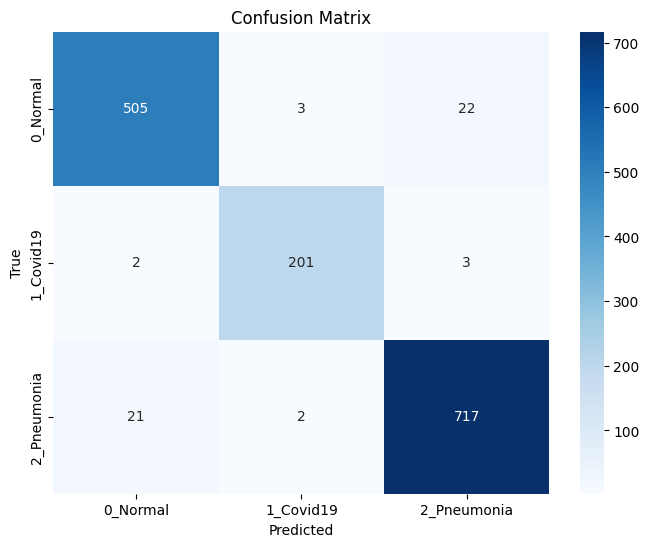

Classification Report:
              precision    recall  f1-score   support

    0_Normal       0.96      0.95      0.95       530
   1_Covid19       0.98      0.98      0.98       206
 2_Pneumonia       0.97      0.97      0.97       740

    accuracy                           0.96      1476
   macro avg       0.97      0.97      0.97      1476
weighted avg       0.96      0.96      0.96      1476

Validation Accuracy: 0.9641


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import numpy as np

# Predict on validation dataset
y_true = []
y_pred = []

# Get class names
class_names = train.class_indices
class_labels = list(class_names.keys())

for images, labels in val_ds:
    preds = model.predict(images)
    indices = np.argmax(preds, axis=1)
    y_pred.extend(indices)
    numeric_labels = labels.numpy()
    labels = np.argmax(numeric_labels, axis=1)
    y_true.extend(labels)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
